In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../data/2023/generated/pre-train/combined_df.csv')
df.head()

C:\Users\pm_\AppData\Local\Temp\ipykernel_1180\1850514127.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/2023/generated/pre-train/combined_df.csv')


,UKPRN,Provider name,Subject code,Subject,Question,Responses,Population,Option 1,Option 2,Option 3,Option 4,Positivity,Response Rate,Question Num,index1,Region
0,NI,Northern Ireland,CAH01-01-02,Medicine (non-specific),How good are teaching staff at explaining thi...,236.0,285.0,59.0,153.0,18.0,6.0,89.8,83.2,Q01,25936,Non-English
1,NI,Northern Ireland,CAH01-01-02,Medicine (non-specific),How often do teaching staff make the subject ...,236.0,285.0,49.0,148.0,34.0,5.0,83.5,83.2,Q02,25937,Non-English
2,NI,Northern Ireland,CAH01-01-02,Medicine (non-specific),How often is the course intellectually stimul...,236.0,285.0,152.0,77.0,6.0,1.0,97.0,83.2,Q03,25938,Non-English
3,NI,Northern Ireland,CAH01-01-02,Medicine (non-specific),How often does your course challenge you to a...,236.0,285.0,109.0,100.0,25.0,2.0,88.6,83.2,Q04,25939,Non-English
4,NI,Northern Ireland,CAH01-01-02,Medicine (non-specific),To what extent have you had the chance to exp...,234.0,285.0,92.0,108.0,29.0,5.0,85.5,83.2,Q05,25940,Non-English


In [3]:
def get_processed_data(data):
  sample = data.copy()
  # sample = data[['Responses', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Option 5', 'Positivity', 'Question Num']]
  sample = sample[['Responses', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Positivity', 'Question Num', 'Region']]
  sample.loc[:, 'Opt-1'] = round((sample['Option 1'] / sample['Responses']) * 100, 1)
  sample.loc[:, 'Opt-2'] = round((sample['Option 2'] / sample['Responses']) * 100, 1)
  sample.loc[:, 'Opt-3'] = round((sample['Option 3'] / sample['Responses']) * 100, 1)
  sample.loc[:, 'Opt-4'] = round((sample['Option 4'] / sample['Responses']) * 100, 1)
  only_options = sample[['Question Num', 'Opt-1', 'Opt-2', 'Opt-3', 'Opt-4', 'Region']]
  # region_false = ''
  # if region == 'English': region_false = 'R_Non-English'
  # else: region_false = 'R_English'
  # only_options[region] = [region]*len(only_options['Opt-1'])
  only_options = only_options.copy()
  only_options.loc[:, 'Positivity'] = only_options['Opt-1'] + only_options['Opt-2']
  # data_2 = pd.get_dummies(only_options, prefix=['N'], dtype=float)
  # data_2[region_false] = [0.0]*len(data_2)
  return only_options

In [4]:
sample = get_processed_data(df)
sample.head()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region,Positivity
0,Q01,25.0,64.8,7.6,2.5,Non-English,89.8
1,Q02,20.8,62.7,14.4,2.1,Non-English,83.5
2,Q03,64.4,32.6,2.5,0.4,Non-English,97.0
3,Q04,46.2,42.4,10.6,0.8,Non-English,88.6
4,Q05,39.3,46.2,12.4,2.1,Non-English,85.5


In [5]:
sample.head(27)

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region,Positivity
0,Q01,25.0,64.8,7.6,2.5,Non-English,89.8
1,Q02,20.8,62.7,14.4,2.1,Non-English,83.5
2,Q03,64.4,32.6,2.5,0.4,Non-English,97.0
3,Q04,46.2,42.4,10.6,0.8,Non-English,88.6
4,Q05,39.3,46.2,12.4,2.1,Non-English,85.5
5,Q06,33.9,50.4,12.7,3.0,Non-English,84.3
6,Q07,48.5,42.6,7.7,1.3,Non-English,91.1
7,Q08,31.8,40.7,19.1,8.5,Non-English,72.5
8,Q09,43.6,48.3,5.9,2.1,Non-English,91.9
9,Q10,23.8,46.8,20.4,8.9,Non-English,70.6


In [6]:
only_options = sample[sample['Region']=='Non-English'].drop(columns=['Question Num', 'Region'])

In [7]:
only_options.shape

(78111, 5)

In [8]:
only_options.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78111 entries, 0 to 78110
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Opt-1       78111 non-null  float64
 1   Opt-2       78111 non-null  float64
 2   Opt-3       78111 non-null  float64
 3   Opt-4       78111 non-null  float64
 4   Positivity  78111 non-null  float64
dtypes: float64(5)
memory usage: 3.6 MB


In [9]:
reshaped_data = only_options.values.reshape((2893, 27, 5))

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
X = reshaped_data[:, :26, :4].reshape(2893, 26*4)
y = reshaped_data[:, 26, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model_new = Sequential()
model_new.add(Dense(128, input_dim=26*4, activation='relu'))
model_new.add(Dense(128, activation='relu'))
# model_new.add(BatchNormalization())
# model_new.add(Dropout(0.2))
model_new.add(Dense(64, activation='relu'))
# model_new.add(BatchNormalization())
# model_new.add(Dropout(0.2))
# model_new.add(Dense(64, activation='relu'))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.2))
model_new.add(Dense(32, activation='relu'))
model_new.add(Dense(16, activation='relu'))
model_new.add(Dense(1))
model_new.compile(optimizer='adam', loss='mean_squared_error')

history_new = model_new.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
loss_new = model_new.evaluate(X_test, y_test)
print("Test Loss:", loss_new)

Epoch 1/100


c:\user_exe\00_Leeds\Dissertation\project-files\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5545.4712 - val_loss: 1643.8048
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1564.5432 - val_loss: 715.7778
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 542.8247 - val_loss: 467.1440
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 243.9336 - val_loss: 743.3029
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 228.7002 - val_loss: 741.0657
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131.1582 - val_loss: 480.1068
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140.7468 - val_loss: 83.7247
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 139.6385 - val_loss: 303.1384
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115.5304 - val_loss: 159.6630
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115.1940 - val_loss: 117.8855
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113.9752 - val_loss: 97.3185
Epoch 12/100
73/73 ━━━━━━━━━━━

In [13]:
sample_input = X_test[0].reshape(1, -1)
predicted_output = model_new.predict(sample_input)
print("Sample Input:", X_test[0])
print("Input Shape:", X_test[0].shape)
print("Predicted Output:", predicted_output[0][0])
print("Actual Output:", y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Sample Input: [34.4 53.1  9.4  3.1 18.8 68.8  9.4  3.1 43.8 43.8  6.2  6.2 50.  37.5
  9.4  3.1 40.6 50.   3.1  6.2 28.1 46.9 21.9  3.1 46.9 43.8  6.2  3.1
 18.8 65.6  9.4  6.2 30.  43.3 23.3  3.3 34.4 43.8 12.5  9.4 25.  53.1
 18.8  3.1 21.9 43.8 25.   9.4 21.9 43.8 21.9 12.5 12.5 59.4 18.8  9.4
 31.2 46.9 15.6  6.2 31.2 50.  12.5  6.2 21.9 56.2  6.2 15.6 34.4 31.2
 21.9 12.5 33.3 56.7  3.3  6.7 61.3 29.   3.2  6.5 30.  60.   6.7  3.3
 29.  58.1 12.9  0.  18.8 46.9 21.9 12.5 15.6 25.  46.9 12.5 30.  46.7
 20.   3.3 48.4 32.3  9.7  9.7]
Input Shape: (104,)
Predicted Output: 78.81437
Actual Output: 84.30000000000001


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 2.724414856596661
Mean Squared Error (MSE): 11.908950540950977
R² Score: 0.9329219183382178


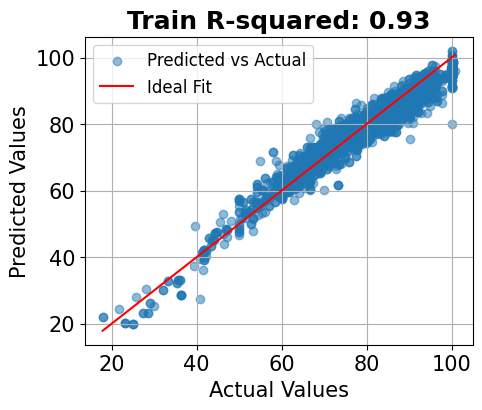

Mean Absolute Error (MAE): 3.4150712449727694
Mean Squared Error (MSE): 20.904644319776803
R² Score: 0.8754413109381317


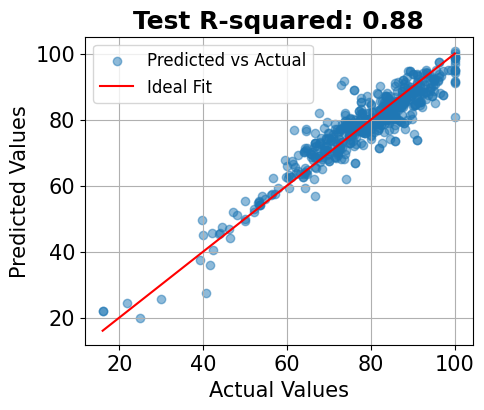

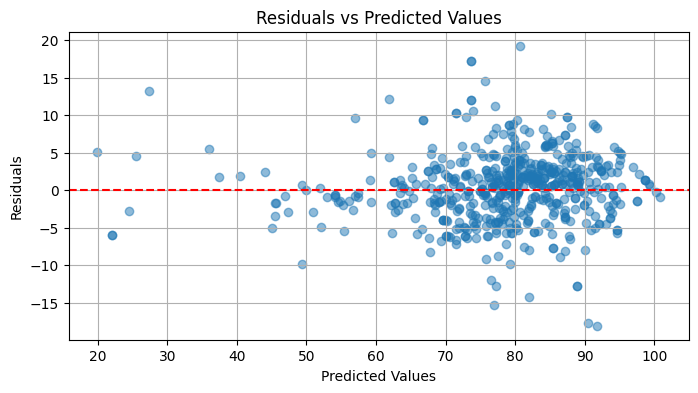

In [14]:
predictions = model_new.predict(X_test)
predictions_train = model_new.predict(X_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2 = r2_score(y_train, predictions_train)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"R² Score: {r2}")

# fig, (ax1, ax2) = plt.subplots(1, 2)


# Plot actual vs predicted values
plt.figure(figsize=(5, 4))
plt.scatter(y_train, predictions_train, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values',fontsize=15)
plt.ylabel('Predicted Values',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Train R-squared: {}'.format(round(r2, 2)), fontsize=18, weight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(5, 4))
plt.scatter(y_test, predictions, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values',fontsize=15)
plt.ylabel('Predicted Values',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Test R-squared: {}'.format(round(r2, 2)), fontsize=18, weight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test - predictions.flatten()
plt.figure(figsize=(8, 4))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()


In [15]:
predictions = model_new.predict(X_test)
predictions_train = model_new.predict(X_train)

r2 = r2_score(y_test, predictions)
r2_train = r2_score(y_train, predictions_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


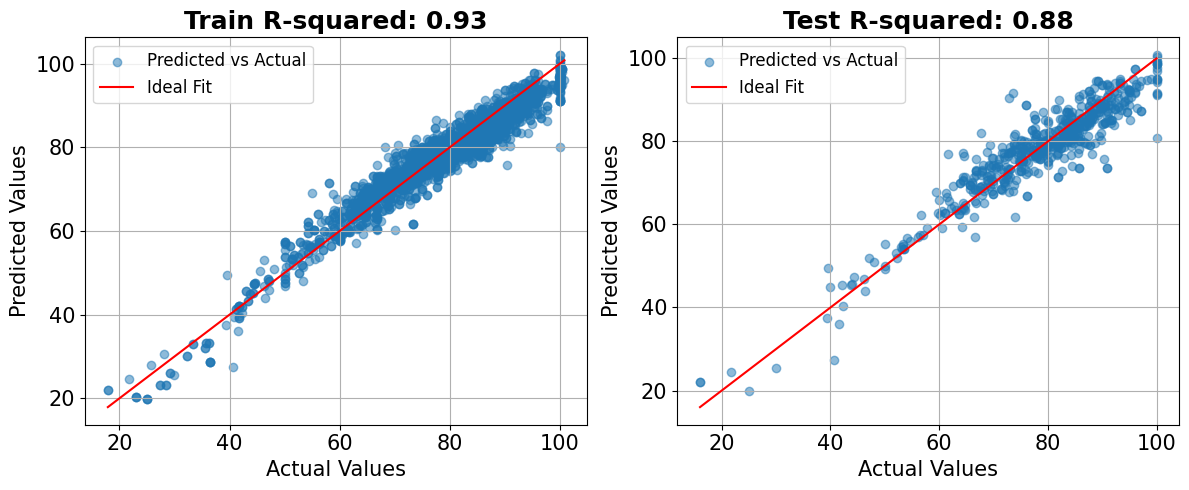

In [16]:
# Create a figure with a grid of 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Plot 1: Actual vs Predicted for Training Data
axes[0].scatter(y_train, predictions_train, alpha=0.5, label='Predicted vs Actual')
axes[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Fit')
axes[0].set_xlabel('Actual Values', fontsize=15)
axes[0].set_ylabel('Predicted Values', fontsize=15)
# axes[0].set_yticks(fontsize=15)
# axes[0].set_xticks(fontsize=15)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].set_title('Train R-squared: {}'.format(round(r2_train, 2)), fontsize=18, weight='bold')
axes[0].legend(fontsize=12)
axes[0].grid(True)

# Plot 2: Actual vs Predicted for Test Data
axes[1].scatter(y_test, predictions, alpha=0.5, label='Predicted vs Actual')
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit')
axes[1].set_xlabel('Actual Values', fontsize=15)
axes[1].set_ylabel('Predicted Values', fontsize=15)
# axes[1].set_yticks(fontsize=15)
# axes[1].set_xticks(fontsize=15)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].set_title('Test R-squared: {}'.format(round(r2, 2)), fontsize=18, weight='bold')
axes[1].legend(fontsize=12)
axes[1].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()

dict_keys(['loss', 'val_loss'])


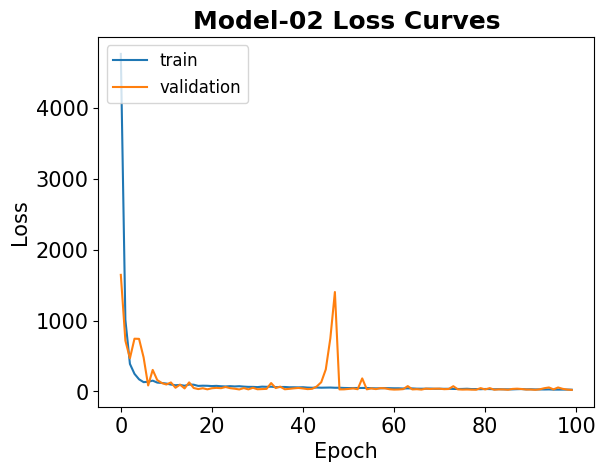

In [17]:
print(history_new.history.keys())
# summarize history for loss
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('Model-02 Loss Curves', fontsize=18, weight='bold')
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=12)
plt.show()